In [1]:
import pymongo
import pandas as pd

data_mongo= pymongo.MongoClient('localhost:27017')

In [2]:
db= data_mongo['test']
rows=db['datarows']

In [3]:
drow1= pd.json_normalize(list(rows.find()[:150000]),sep='_')
drow2= pd.json_normalize(list(rows.find()[150000:300000]),sep='_')
drow3= pd.json_normalize(list(rows.find()[300000:450000]),sep='_')
drow4= pd.json_normalize(list(rows.find()[450000:600000]),sep='_')
drow5= pd.json_normalize(list(rows.find()[600000:750000]),sep='_')
drow6= pd.json_normalize(list(rows.find()[750000:900000]),sep='_')
drow7= pd.json_normalize(list(rows.find()[900000:1050000]),sep='_')
drow8= pd.json_normalize(list(rows.find()[1050000:1200000]),sep='_')
drow9= pd.json_normalize(list(rows.find()[1200000:]),sep='_')

In [4]:
df_row=pd.concat([drow1,drow2,drow3,drow4,drow5,drow6,drow7,drow8,drow9],axis=0)
df_row.shape

(1296780, 22)

In [5]:
df_row._id=df_row._id.astype(str)

In [5]:
df_row.dataRowType.unique()

array(['BEACON', 'GPS', 'BATTERY', nan], dtype=object)

In [7]:
data_gps=df_row[df_row.dataRowType=='GPS']
data_beacon= df_row[df_row.dataRowType=='BEACON']
data_battery= df_row[df_row.dataRowType=='BATTERY']

In [23]:
df_gps=data_gps[['UUID','dataRowType','createdAt','updatedAt','dataRowData_lat','dataRowData_lng','dataRowData_gpsAlt','dataRowData_gpsVel','dataRowData_gpsFixed']]

In [24]:
df_bate=data_battery[['UUID','dataRowType','createdAt','updatedAt','dataRowData_timestamp','dataRowData_battery']]

In [25]:
df_beacon=data_beacon[['UUID','dataRowType','createdAt','updatedAt','dataRowData_timestamp','dataRowData_mac','dataRowData_battery','dataRowData_temperature','dataRowData_rssi','dataRowData_accelerometer']]

In [10]:
df_bate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 6 to 96776
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   UUID                   100500 non-null  object        
 1   updatedAt              100500 non-null  datetime64[ns]
 2   dataRowData_timestamp  100500 non-null  object        
 3   dataRowData_battery    98833 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.8+ MB


In [11]:
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321019 entries, 1 to 96773
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   UUID                  321019 non-null  object        
 1   updatedAt             321019 non-null  datetime64[ns]
 2   dataRowData_lat       319620 non-null  float64       
 3   dataRowData_lng       319622 non-null  float64       
 4   dataRowData_gpsAlt    320871 non-null  float64       
 5   dataRowData_gpsVel    320871 non-null  float64       
 6   dataRowData_gpsFixed  320871 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 19.6+ MB


In [12]:
df_beacon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875260 entries, 0 to 96779
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   UUID                       875260 non-null  object        
 1   updatedAt                  875260 non-null  datetime64[ns]
 2   dataRowData_timestamp      875260 non-null  object        
 3   dataRowData_mac            875260 non-null  object        
 4   dataRowData_battery        875260 non-null  float64       
 5   dataRowData_temperature    875260 non-null  float64       
 6   dataRowData_rssi           875260 non-null  float64       
 7   dataRowData_accelerometer  230272 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 60.1+ MB


In [20]:
df_gps[df_gps.UUID=='0004A30B00F842B6']

,UUID,updatedAt,dataRowData_lat,dataRowData_lng,dataRowData_gpsAlt,dataRowData_gpsVel,dataRowData_gpsFixed
22667,0004A30B00F842B6,2023-03-10 21:39:56.083,-32.849794,-63.580536,0.0,0.055,1.0
22950,0004A30B00F842B6,2023-03-10 21:54:03.019,-32.849809,-63.580539,225.6,0.003,1.0
23195,0004A30B00F842B6,2023-03-10 22:06:59.113,-32.849797,-63.580911,224.8,0.201,1.0
23403,0004A30B00F842B6,2023-03-10 22:21:14.271,-32.849797,-63.580911,224.8,0.201,1.0
23648,0004A30B00F842B6,2023-03-10 23:15:22.910,NaN,NaN,0.0,0.000,1.0
...,...,...,...,...,...,...,...
96413,0004A30B00F842B6,2023-04-05 11:03:06.802,-34.205670,-64.031680,184.1,0.257,1.0
96431,0004A30B00F842B6,2023-04-05 11:16:03.558,-34.205652,-64.031674,169.5,0.095,1.0
96449,0004A30B00F842B6,2023-04-05 11:30:18.080,-34.205808,-64.031951,173.0,1.016,1.0
96482,0004A30B00F842B6,2023-04-05 11:47:38.280,-34.205672,-64.031708,0.0,0.022,1.0


In [26]:
vaca_1=df_gps[df_gps.UUID=='0004A30B00F8A181']
#vaca_1.updatedAt= pd.to_datetime(vaca_1.updatedAt)

In [48]:
vaca2=df_gps[df_gps.UUID=='0004A30B00F89C52']#0004A30B00F842B6-0004A30B00F8B217
vaca2 = vaca2.dropna()

In [15]:
from geopy.distance import geodesic,great_circle
from geopy import Point


cordena1=tuple(datos_gps.iloc[0].values)
cordena2= tuple(datos_gps.iloc[-1].values)

dista_km= great_circle(cordena1,cordena2).kilometers
velocidad= vaca_1.dataRowData_gpsVel.mean()
time_travel= dista_km/velocidad

print(f'distancia:{dista_km:.2f} km')
print(f'Velocidad: {velocidad:.2f} km')
print(f'Tiempo:{time_travel:.2f} km')

distancia:1.32 km
Velocidad: 0.41 km
Tiempo:3.22 km


In [139]:
def interview_vaca(valores):
    data=[]
    for i in range(0,valores.shape[0]):
        try:
            dista_km= great_circle(tuple(valores.iloc[i].values),tuple(valores.iloc[i+1].values)).kilometers
            if dista_km <= 8.:
                data.append(dista_km)
        except IndexError:
            pass
    return data

In [146]:
import geopandas as gpd
from shapely.geometry import Point
import folium

In [145]:
setle_lat=-34.163851
setle_lng=-64.071678

gdf= gpd.GeoDataFrame(df_gps,crs='EPSG:4326',geometry=gpd.points_from_xy(df_gps.dataRowData_lng,df_gps.dataRowData_lat))

In [106]:
import math
def perimetro_aprox(hectarea):
    hect=hectarea
    lado = math.sqrt(hect)*10
    perim = lado*4
    return perim

def area_perimetro(latitud,longitud,hectareas):
    setle_lat=latitud
    setle_lng=longitud
    punto_referencia= Point(setle_lng,setle_lat)	
    per_kilo= perimetro_aprox(hectareas)
    circulo= punto_referencia.buffer(per_kilo/111.32) # valor 1 grado aprox en kilometro en el ecuador 
    on_perimetro= gdf[gdf.geometry.within(circulo)]
    return on_perimetro

In [111]:
def data_devices(data,uuid):
    data=data[data.UUID==uuid]
    return data

def gps_data(data):
    gps= data[['dataRowData_lat','dataRowData_lng']]
    gps = gps.dropna()
    return gps

In [118]:
def grafica_gps(datos_gps,graf):
    for i , d in datos_gps.iterrows():
        folium.Marker(location=[d['dataRowData_lat'],d['dataRowData_lng']]).add_to(graf)
    folium.PolyLine(locations=datos_gps).add_to(graf) #necesitya una funcion que me genere colores aleatorio para identificar

In [ ]:
on_perimetro= area_perimetro(latitud=setle_lat,longitud=setle_lng,hectareas= 1.09)

In [134]:
datos_prueba= interview_vaca(v_peri2[['dataRowData_lat','dataRowData_lng']])

<AxesSubplot: >

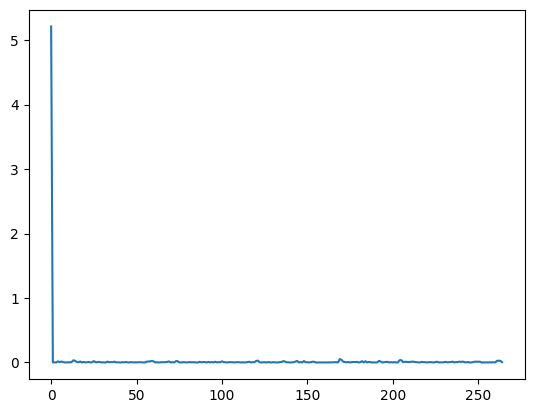

In [135]:
pd.Series(datos_prueba).plot()

In [109]:
uuid_devis= on_perimetro.UUID.unique()

In [ ]:
aux=0
mp=folium.Map()
for i in uuid_devis[:4]:
    if aux == 0:
        dta=data_devices(on_perimetro, i )
        dta_gps= gps_data(dta)
        mp=folium.Map(location=[setle_lat,setle_lng],zoom_start=15)
        grafica_gps(dta_gps,mp)
        aux = 1
    else:
        dta=data_devices(on_perimetro, i )
        dta_gps= gps_data(dta)
        grafica_gps(dta_gps,mp)
        aux = 1
mp

In [125]:
def filter_time_day(data,momento):
    switch_dict={
        'noche': data[((data.updatedAt.dt.hour > 20) & (data.updatedAt.dt.hour < 24))| ((data.updatedAt.dt.hour > 0) & (data.updatedAt.dt.hour < 7))],
        'madrugada':  data[(data.updatedAt.dt.hour > 0) & (data.updatedAt.dt.hour < 7)],
        'tarde':data[(data.updatedAt.dt.hour > 13) & (data.updatedAt.dt.hour < 20)],
        'mañana':data[(data.updatedAt.dt.hour > 7) & (data.updatedAt.dt.hour < 13)]
    }
    return switch_dict.get(momento,'valor')

In [124]:
d= filter_time_day(on_perimetro,'noche')
d

,_id,UUID,dataRowType,createdAt,updatedAt,__v,dataRowData_timestamp,dataRowData_mac,dataRowData_battery,dataRowData_temperature,...,dataRowData_lat,dataRowData_lng,dataRowData_gpsAlt,dataRowData_gpsVel,dataRowData_gpsFixed,dataRowData_voltage,dataRowData_charge,dataRowData_temperatureSoC,payload,geometry
34708,63ed5dcdb0b2250030e43772,0004A30B00F860CC,GPS,2023-02-17 10:00:36.470,2023-02-15 22:33:49.287,0.0,2023-15-02T22:33:27,NaN,NaN,NaN,...,-34.164539,-64.069916,0.0,0.845,1.0,NaN,NaN,NaN,NaN,POINT (-64.06992 -34.16454)
34710,63ed6194b0b2250030e4377d,0004A30B00F860CC,GPS,2023-02-17 10:00:36.470,2023-02-15 22:49:56.134,0.0,2023-15-02T22:49:02,NaN,NaN,NaN,...,-34.164759,-64.069881,0.0,1.116,1.0,NaN,NaN,NaN,NaN,POINT (-64.06988 -34.16476)
34712,63ed655cb0b2250030e437d3,0004A30B00F860CC,GPS,2023-02-17 10:00:36.470,2023-02-15 23:06:04.934,0.0,2023-15-02T23:05:12,NaN,NaN,NaN,...,-34.164613,-64.069799,0.0,2.391,1.0,NaN,NaN,NaN,NaN,POINT (-64.06980 -34.16461)
34713,63ed68e4b0b2250030e437d9,0004A30B00F860CC,GPS,2023-02-17 10:00:36.470,2023-02-15 23:21:08.776,0.0,2023-15-02T23:20:42,NaN,NaN,NaN,...,-34.164625,-64.069895,0.0,0.761,1.0,NaN,NaN,NaN,NaN,POINT (-64.06989 -34.16462)
34714,63ed6c6cb0b2250030e437df,0004A30B00F860CC,GPS,2023-02-17 10:00:36.470,2023-02-15 23:36:12.610,0.0,2023-15-02T23:35:57,NaN,NaN,NaN,...,-34.164699,-64.069858,196.5,1.058,1.0,NaN,NaN,NaN,NaN,POINT (-64.06986 -34.16470)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96085,642d16eab239c60030f943f7,0004A30B00F83085,GPS,2023-04-05 06:36:26.032,2023-04-05 06:36:26.032,0.0,2023-05-04T06:20:42,NaN,NaN,NaN,...,-34.205681,-64.031863,0.0,0.060,1.0,NaN,NaN,NaN,b406142a0504175b2ea9eb3875d7d900003c0001,POINT (-64.03186 -34.20568)
96094,642d18b5b239c60030f94460,0004A30B00F842B6,GPS,2023-04-05 06:44:05.296,2023-04-05 06:44:05.296,0.0,2023-05-04T06:08:38,NaN,NaN,NaN,...,-34.205748,-64.031704,0.0,0.048,1.0,NaN,NaN,NaN,b4060826050417c62ca9ebf078d7d90000300001,POINT (-64.03170 -34.20575)
96100,642d1986b239c60030f9449c,0004A30B00F89C52,GPS,2023-04-05 06:47:34.487,2023-04-05 06:47:34.487,0.0,2023-05-04T06:46:42,NaN,NaN,NaN,...,-34.205694,-64.031837,0.0,0.037,1.0,NaN,NaN,NaN,b4062e2a0504170f2ea9ebd375d7d90000250001,POINT (-64.03184 -34.20569)
96103,642d1a2eb239c60030f944c6,0004A30B00F8B217,GPS,2023-04-05 06:50:22.255,2023-04-05 06:50:22.255,0.0,2023-05-04T06:49:07,NaN,NaN,NaN,...,-34.205669,-64.031953,166.7,0.026,1.0,NaN,NaN,NaN,b40631070504179f2ea9eb1973d7d983061a0001,POINT (-64.03195 -34.20567)
